# CS 109A/AC 209A/STAT 121A Data Science: Homework 1
**Harvard University**<br>
**Fall 2016**<br>
**Instructors: W. Pan, P. Protopapas, K. Rader**<br>
**Due Date: ** Tuesday, September 13th, 2016 at 11:59pm

Download the `IPython` notebook as well as the data file from Vocareum and complete locally.

To submit your assignment, in Vocareum, upload (using the 'Upload' button on your Jupyter Dashboard) your solution to Vocareum as a single notebook with following file name format:

`last_first_CourseNumber_HW1.ipynb`

where `CourseNumber` is the course in which you're enrolled (CS 109a, Stats 121a, AC 209a). Submit your assignment in Vocareum using the 'Submit' button.

**Avoid running your notebook on Vocareum and avoid changing your file after submitting.**

Problems on homework assignments are equally weighted. The Challenge Question is required for AC 209A students and optional for all others. Student who complete the Challenge Problem as optional extra credit will receive +0.5% towards your final grade for each correct solution. 

Import libraries

In [366]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
#from __future__ import division # Python 2.7 uses integer division by default, so that 5 / 2 equals 2, this sfixes that

%matplotlib inline

---

## Problem 0: Basic Information

Fill in your basic information. 

### Part (a): Your name

Farmer, Rick

### Part (b): Course Number

CSCI E 109a

---

## Problem 1: Basic Data Visualization, Manipulation and Analysis

In this problem, we will be using some basic tools of data visualization and statistical analysis to help build our intuition for finding, describing and interpreting patterns in data. We will be working with the data contained in the file `dataset_HW1.txt`. The data in `dataset_HW1.txt` contains biometric readings for a number of diabetic patients. In this problem, we will try to detect disease subtypes within this set of patients using their biometric readings.

### Part (a): Understanding a Pandas Dataframe
Load the data from `dataset_HW1.txt` into a pandas dataframe. Get a basic picture of the information contained in the dataframe by printing the head, the size of the dataframe, the range of values in numeric-valued columns. Store the max, min and range information as a pandas dataframe.

<b>Solution:</b>

In [367]:
# Load the data set into a pandas dataframe
df = pd.read_csv('dataset_HW1.txt')

# Print the size of the dataframe
print "Number of patients (rows):", df.shape[0], "\n"
print "Number of features (co:", df.shape[1], "\n"


# Output the first five rows of the dataframe
print "Head of the dataframe:"
df.head(5)


Number of patients (rows): 2300 

Number of features (co: 6 

Head of the dataframe:


patient_id   marker_1    marker_2  subtype  patient_age patient_gender
0      619681  21.640523  144.001572      0.0            3         female
1      619711  13.787380  162.408932      0.0           15         female
2      619595  22.675580  130.227221      0.0            6         female
3      619990  13.500884  138.486428      0.0           17           male
4      619157   2.967811  144.105985      0.0            6         female

In [368]:
#choose columns 1, 2, 3, 4 (ignoring columns 0 and 4)
df_cols_1_to_4 = df[range(1, 5)] 

#get column names from important_column dataframe
column_names = df_cols_1_to_4.columns.values 

#create pandas dataframe with column names given by column_names
stats = pd.DataFrame(columns=column_names)

#create a row called 'max' and store max values from the columns of important_columns
stats.loc['max'] = df_cols_1_to_4.max()

#create a row called 'min' and store min values from the columns of important_columns
stats.loc['min'] = df_cols_1_to_4.min()

#create a row called 'range' and store range of values from the columns of important_columns
stats.loc['range'] = df_cols_1_to_4.max() - df_cols_1_to_4.min()
stats.head(n=5)

marker_1    marker_2  subtype  patient_age
max     80.209748  364.221777      3.0         90.0
min    -22.591722  -56.388949      0.0          3.0
range  102.801470  420.610725      3.0         87.0

### Part (b): Descriptive Statistics
Find the mean, median and standard deviation of the real-valued columns in the entire dataset. Now find the same set of descriptive statistics for each of the following subset of data:

1. children (ages 3 - 17)
2. adult males (ages 18 - 90)
3. adult females (ages 18 - 90)

Append these stats to the dataframe from part (a), containing the max, min and range. Explain what these stats say about the entire dataset as well as each of the above subsets.

Give a summary of the demographics of the patients contained in the dataset, i.e. how many children, how many adults, how many adult females and how many adult males. Display these results as pie charts.

**Solution:**

In [369]:
#choose columns 1, 2, 4 (ignoring columns 0, 3 and 4)
df_cols_1_2_4 = df[[1, 2, 4]] 

stats.loc['mean'] = df_cols_1_2_4.mean()
stats.loc['median'] = df_cols_1_2_4.median()
stats.loc['std'] = df_cols_1_2_4.std()
stats

marker_1    marker_2  subtype  patient_age
max      80.209748  364.221777      3.0    90.000000
min     -22.591722  -56.388949      0.0     3.000000
range   102.801470  420.610725      3.0    87.000000
mean     31.970053  105.974247      NaN    38.868261
median   33.743705  105.179291      NaN    35.000000
std      18.096490   52.306201      NaN    27.211950

In [370]:
#Create three different datasets by filtering our entire set
children_data = df[df['patient_age'] < 18]
adult_women_data = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'female')]
adult_male_data = df[(df['patient_age'] > 17) & (df['patient_gender'] == 'male')]
    
#create dataframe with select column names
column_names = children_data[range(1, 5)].columns.values
child_stats = pd.DataFrame(columns=column_names)

#add a row for each stat
child_stats.loc['child_max'] = children_data[range(1, 5)].max()
child_stats.loc['child_min'] = children_data[range(1, 5)].min()
child_stats.loc['child_range'] = children_data[range(1, 5)].max() - children_data[range(1, 5)].min()

child_stats.loc['child_mean'] = children_data[[1, 2, 4]].mean()
child_stats.loc['child_median'] = children_data[[1, 2, 4]].median()
child_stats.loc['child_std'] = children_data[[1, 2, 4]].std()

child_stats

marker_1    marker_2  subtype  patient_age
child_max      80.209748  171.429357      3.0    17.000000
child_min     -22.591722   70.538569      0.0     3.000000
child_range   102.801470  100.890788      3.0    14.000000
child_mean     26.267379  121.396907      NaN    10.106250
child_median   26.868357  121.799063      NaN    10.000000
child_std      24.972128   23.658433      NaN     4.307337

In [371]:
# Calculate adult female stats
#create dataframe with select column names
column_names = adult_women_data[range(1, 5)].columns.values
adult_women_stats = pd.DataFrame(columns=column_names)

#add a row for each stat
adult_women_stats.loc['adult_f_max'] = adult_women_data[range(1, 5)].max()
adult_women_stats.loc['adult_f_min'] = adult_women_data[range(1, 5)].min()
adult_women_stats.loc['adult_f_range'] = adult_women_data[range(1, 5)].max() - adult_women_data[range(1, 5)].min()

adult_women_stats.loc['adult_f_mean'] = adult_women_data[[1, 2, 4]].mean()
adult_women_stats.loc['adult_f_median'] = adult_women_data[[1, 2, 4]].median()
adult_women_stats.loc['adult_f_std'] = adult_women_data[[1, 2, 4]].std()
adult_women_stats

marker_1    marker_2  subtype  patient_age
adult_f_max     59.702106  190.047718      1.0    90.000000
adult_f_min     28.364561  -43.386768      0.0    18.000000
adult_f_range   31.337545  233.434486      1.0    72.000000
adult_f_mean    44.053269   74.006378      NaN    54.613750
adult_f_median  43.911490   73.086403      NaN    56.000000
adult_f_std      7.141580   53.320292      NaN    21.094034

In [372]:
# Calculate adult male stats
#create dataframe with select column names
column_names = adult_male_data[range(1, 5)].columns.values
adult_male_stats = pd.DataFrame(columns=column_names)

#add a row for each stat
adult_male_stats.loc['adult_m_max'] = adult_male_data[range(1, 5)].max()
adult_male_stats.loc['adult_m_min'] = adult_male_data[range(1, 5)].min()
adult_male_stats.loc['adult_m_range'] = adult_male_data[range(1, 5)].max() - adult_male_data[range(1, 5)].min()

adult_male_stats.loc['adult_m_mean'] = adult_male_data[[1, 2, 4]].mean()
adult_male_stats.loc['adult_m_median'] = adult_male_data[[1, 2, 4]].median()
adult_male_stats.loc['adult_m_std'] = adult_male_data[[1, 2, 4]].std()
adult_male_stats

marker_1    marker_2  subtype  patient_age
adult_m_max     40.458624  364.221777      2.0    90.000000
adult_m_min      1.860516  -56.388949      0.0    18.000000
adult_m_range   38.598108  420.610725      2.0    72.000000
adult_m_mean    24.678005  124.883059      NaN    53.744286
adult_m_median  26.168875  110.893774      NaN    54.000000
adult_m_std      6.956745   57.523807      NaN    21.295497

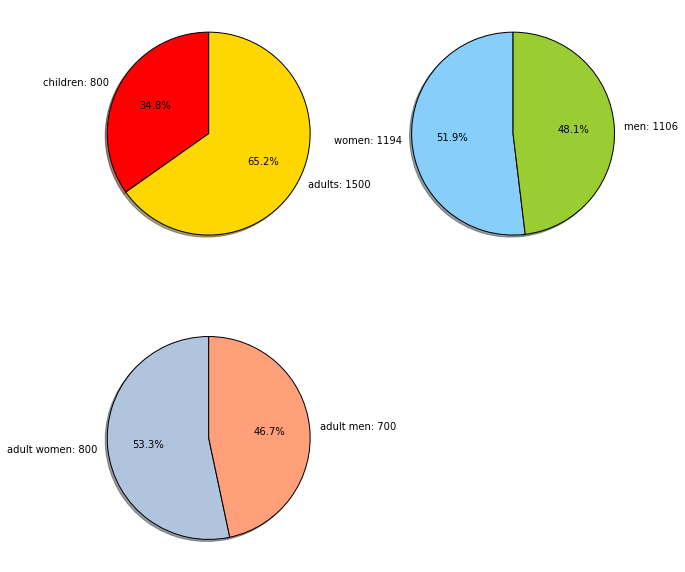

In [373]:
#children vs adults pie chart
children = children_data.shape[0] #number of kids
adults = df.shape[0] - children #adults = total number - kids

fig = plt.figure(figsize=(10, 10))

ax1 = fig.add_subplot(221)
ax1.pie([children, adults], 
        labels=['children: ' + str(children), 'adults: ' + str(adults)], 
        colors=['red', 'gold'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#women vs men pie chart
women = df[df['patient_gender'] == 'female'].shape[0] #number of women
men = df.shape[0] - women #men = total number - women

ax2 = fig.add_subplot(222)
ax2.pie([women, men], 
        labels=['women: ' + str(women), 'men: ' + str(men)], 
        colors=['lightskyblue', 'yellowgreen'],
        autopct='%1.1f%%', shadow=True, startangle=90)

#adult women vs men pie chart
adult_women = adult_women_data.shape[0]
adult_men = adults - adult_women

ax3 = fig.add_subplot(223)
ax3.pie([adult_women, adult_men], 
        labels=['adult women: ' + str(adult_women), 'adult men: ' + str(adult_men)], 
        colors=['lightsteelblue', 'lightsalmon'],
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()

### Part (c): Data Visualization
To understand how the biometric reading might help us determine diabetic subtypes, we begin with some visual analysis of the biometric data:

1. plot histograms of marker 1 and marker 2 (play with different values for the bin number to find the most usefule visualization)
2. plot both markers in a scatter plot, color each point according to disease subtype

Do the above for each demographics within the data: children, adult men and adult women.

**Solution:**

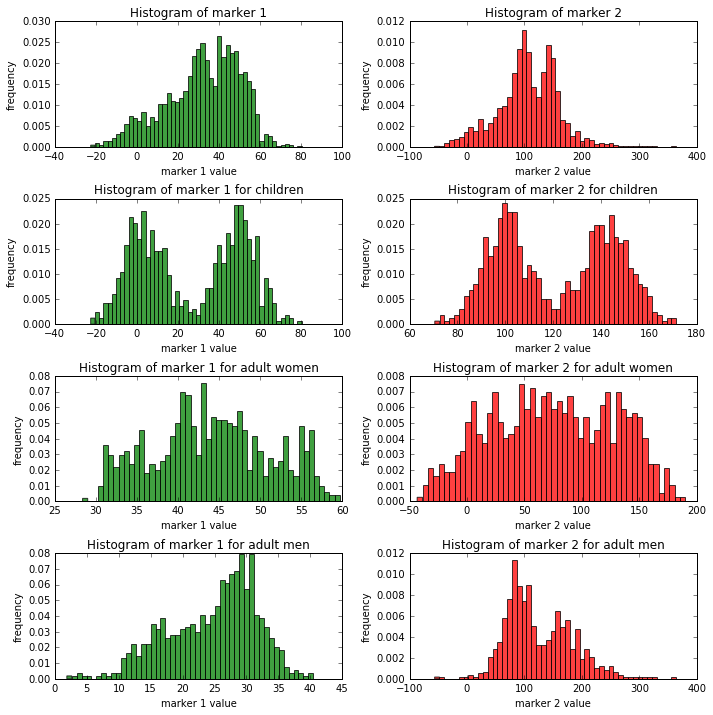

In [374]:
#function for plotting histograms
def plot_hist(data, title, x_label, face, axes):
    
    axes.hist(data, 
         50, 
         normed=1, 
         facecolor=face, 
         alpha=0.75)
    
    axes.set_title(title)
    axes.set_xlabel(x_label)
    axes.set_ylabel('frequency')
    
    return axes
    
#plot histograms for each marker and each demographics
#in the following, instead of adding one subplot to a 4x2 grid at a time
#I can get all the subplot axes for the grid in one line 
fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7, ax8)) = plt.subplots(4, 2, figsize=(10, 10))
ax1 = plot_hist(df['marker_1'],
                'Histogram of marker 1', 
                'marker 1 value', 
                'green', 
                ax1)

ax2 = plot_hist(df['marker_2'],
                'Histogram of marker 2', 
                'marker 2 value', 
                'red', 
                ax2)

ax3 = plot_hist(children_data['marker_1'],
                'Histogram of marker 1 for children', 
                'marker 1 value', 
                'green', 
                ax3)

ax4 = plot_hist(children_data['marker_2'],
                'Histogram of marker 2 for children', 
                'marker 2 value', 
                'red', 
                ax4)

ax5 = plot_hist(adult_women_data['marker_1'],
                'Histogram of marker 1 for adult women', 
                'marker 1 value', 
                'green', 
                ax5)

ax6 = plot_hist(adult_women_data['marker_2'],
                'Histogram of marker 2 for adult women', 
                'marker 2 value', 
                'red', 
                ax6)

ax7 = plot_hist(adult_male_data['marker_1'],
                'Histogram of marker 1 for adult men', 
                'marker 1 value', 
                'green', 
                ax7)

ax8 = plot_hist(adult_male_data['marker_2'],
                'Histogram of marker 2 for adult men', 
                'marker 2 value', 
                'red', 
                ax8)

plt.tight_layout()
plt.show()

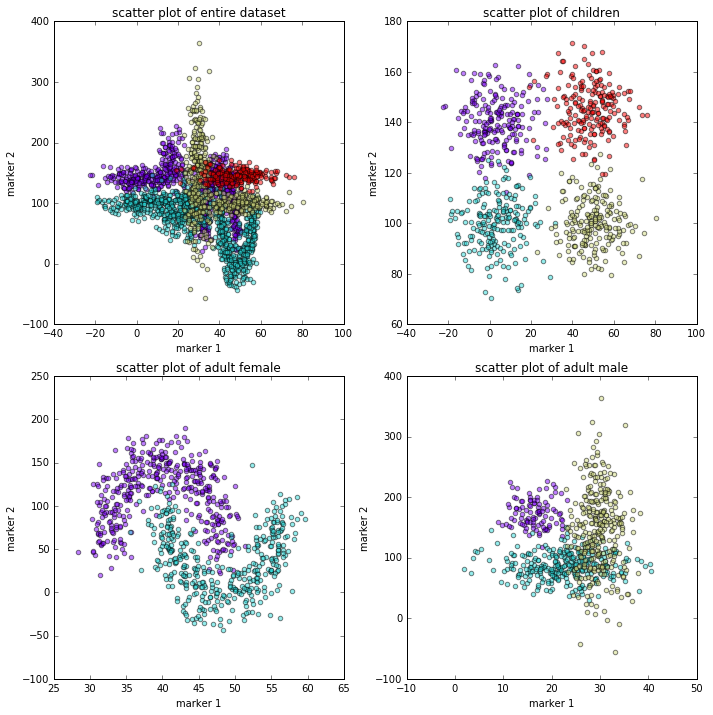

In [375]:
def plot_scatter(data, plot_title, x_lable, y_lable, groups, axes):
    #set up color map (one color per group number)
    
    #split [0, 1] in to as many parts as there are groups
    group_numbers = np.linspace(0, 1, groups) 
    #get a color map
    c_map = plt.get_cmap('rainbow') 
    #get a range of colors from color map
    c_norm  = colors.Normalize(vmin=0, vmax=group_numbers[-1])
    #get a map that maps a group number to a color
    number_map = cmx.ScalarMappable(norm=c_norm, cmap=c_map)
    
    #plot points colored by their group number
    for group in xrange(groups):
        #convert a group number into a color using our map
        color = number_map.to_rgba(group_numbers[group])
        #make a scatter plot of a specific group colored by its group number color
        axes.scatter(data[data['subtype'] == group]['marker_1'], 
                     data[data['subtype'] == group]['marker_2'], 
                     c=color, 
                     alpha = 0.5)

    axes.set_title(plot_title) 
    axes.set_xlabel(x_lable)
    axes.set_ylabel(y_lable)
    
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(10, 10))

plot_scatter(df, 'scatter plot of entire dataset', 'marker 1', 'marker 2', 4, ax1)  
plot_scatter(children_data, 
             'scatter plot of children', 
             'marker 1', 'marker 2', 
             4,
             ax2)  
plot_scatter(adult_women_data, 
             'scatter plot of adult female', 
             'marker 1', 
             'marker 2', 
             4, 
             ax3)  
plot_scatter(adult_male_data, 
             'scatter plot of adult male', 
             'marker 1', 
             'marker 2', 
             4, 
             ax4) 

plt.tight_layout()
plt.show()

# Purple is for individuals who have subtype 0,
# Blue is for those who have subtype 1
# Yellow if for those with subtype 2
# Red is for those with subtype 3

### Part (d): Putting it All Together

Summarize and interpret the patterns in the **histograms** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric data (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Summarize and interpret the patterns in the **scatter plots** from Part (c), compare these patterns to each other. In particular, explain what these patterns indicate about the relationship between the biometric readings (marker 1 and marker 2) and subtypes of diabetes amongst the patients.

Do your analyses of the patterns in histograms and the scatter plots support or contradict each other? Is one of the two visualizations more useful than the other for anlyzing the relationship between biometric data and disease subtypes? If so which, and why?

Compare the descriptive stats you computed in part (b) with the visualizations. Which aspects of the visualizations (histogram and scatter plots) does each statistic measure? 

Do the stats support, contradict or enhance your visual analysis of the biometric data? 

Finally, what can you conclude, based on your visual analysis and stats, about the relationship between biometric data and diabetic subtypes in this pool of patients?

**Solution:**

1. **Histograms** 

a. in the histograms of (both Marker 1 and Marker 2) for the entire data set, it looks like there might be multiple modes, but it's not entirely clear that this is not due to noise. 

b. in the histograms of (both Marker 1 and Marker 2) for children, it is very clear that the distribution for Marker 1 and Marker 2 are bimodal. That is the children dataset falls into two distinct groups based on their Marker 1 biometric and two distinct groups based on their Marker 2 biometric. **Note:** It's not clear if the subgrouping by the two markers are the same or different! 

c. in the histograms of (both Marker 1 and Marker 2) for adult women, the distributions looks unimodal 

d. in the histogram of Marker 1 for adult men, the distribution looks unimodal; the histogram of Marker 2 for adult men looks bimodal

2. **Scatter Plots** 

a. It appears that while the over all dataset has four disease subtypes, all four are present only in children. There are only two subtypes present for adult women and three for adult men. 

b. In the scatter plot (color code by disease subtype) for the entire dataset, there doesn't seem to be clear separation between the data points in the different subtypes. 

c. In the scatter plot for the children dataset, the points in the different subtypes are well separated. Points for each subtypes form spherical clusters and are concentrated around a "center". 

d. In the scatter plot for the adult female dataset, the points in the different subtypes form clusters, the clusters are separated, but are in crescent shapes. 

e. In the scatter plot for the adult male dataset, the points in the different subtypes form clusters. Two of the clusters overlap.

3. **Comparison of Visualizations and Stats** 

a. The modes in the histogram correspond to clustering of the biometric data by disease subtype. 

b. Using the histogram alone, we cannot necessarily deduce the distribution of the scatter plots. 

c. Using the histograms alone, we cannot deduce clustering by disease subtypes. The modes in the histogram tell us where the data is concentrated along which axis, but they cannot tell us which disease subtypes exist in each mode. 

d. The stats we calculated for the entire dataset also give no indication of the patterns we see in the scatter plots.

4. **Conclusion** 

a. if we looked at the data one demographic group at a time, then, for all demographic groups, it looks like biometric data cluster by disease type. 

b. the clusters are well separated for children, the separation is along both the Marker 1 and Marker 2 axes. The separation is not so clear for the other two groups.

---

## Problem 2: Introduction to Classification

In this problem, we will use your analysis of the relationship between biometric data and diabetic subtypes from Problem 1 to **classify** the disease subtype of new patients.

### Part (a): A Disease Subtype Classifier for Children

In the pool of child patients, compute the mean biometric data (marker 1 and marker 2) for each diabetic subtype. For a new patient between the ages of 3 and 18, we will classify the patient as the subtype whose biometric mean is most ``similar" to the patient's biometric data.

- Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

To evaluate our classifier, we can use it to classify a set of new patients whose disease subtype we already know. We measure the quality of our classifier by compute the percentage of new patients whose disease subtype we correctly classify. 

- Explain why the percentage of correct classification is a reasonable way to evaluate our classifier. What might be some shortcomings or ambiguities of this method of evaluation (**Hint:** think about the effect of the number of patients in each disease subtype, confidence level etc).

**Solution:**

In [376]:
# In the pool of child patients, compute the mean biometric data (marker 1 and marker 2) for each diabetic subtype
print "Children marker 1 mean", children_data['marker_1'].mean()
print "Children marker 2 mean", children_data['marker_2'].mean()

Children marker 1 mean 26.267378817
Children marker 2 mean 121.396907126


**Explain why this way of classifying disease subtypes of new patients is reasonable.**

Based on the marker data we have seen for the various diabetic subtypes, in this case, ages 3 to 18, we find that depending on the marker type value the subgroup correlation becomes apparent based on the mean.  This would be a reasonable way to begin the classification of the new population based on the current sample available.


**Support your explanation with your analysis from Problem 1.**

Because the histograms of (both Marker 1 and Marker 2) for children, have a distribution for Marker 1 and Marker 2 that clearly bimodal. I would seem that the children dataset falls into two distinct groups based on their Marker 1 biometric and two distinct groups based on their Marker 2 biometric. The mean being a breakpoint between the subtypes.  In the instance of Marker 1 that would be a mean of 26 and for Marker 2 a mean of 121. This provides us a starting point to associate the existing data with the new patient data. 

**Explain why the percentage of correct classification is a reasonable way to evaluate our classifier.**

A corresponding high percentage of correct classification by our classifier would correspond to accuracy.  We are looking for a highly accurate classifier.

**What might be some shortcomings or ambiguities of this method of evaluation**

Some of the shortcomings and ambiguities may be that the classification with outliers may have some overlap with two subtypes, our sample size may be biased in some way, or too small to be representative.

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%). 

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and testing data (representing new patients), which then:

    1. computes the biometric means for subtypes using the training data 
    2. classifies the disease subtype of each new patient by comparing their biometric data to the means you've computed (i.e. compute the Euclidean distance between a new patient's biometric data and the biometric means of each disease subtype, classify the new patient as the subtype whose means is most similar in term of the Euclidean distance)


- Write a function, `evaluate`, that takes as input the actual disease subtypes for a set of patients as well as the predicted disease subtypes and computes the percentage of new patients who are correctly classified.

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

**Solution:**

In [410]:
# Classify disease subtypes for new patients based on a subtype whose biometric mean is most similar to the patient's biometric data
def classify(training_data, testing_data):
    
    # Setup our classified return type, {'patient_id':619711,'predicted_subtype':1.0,'actual_subtype':1.0}
    classified = pd.DataFrame(columns=['patient_id', 'predicted_subtype', 'actual_subtype'])
    
    # Get only the unique values for subtype, e.g. 0.0, 1.0, 2.0, 3.0
    subtypes_set = set(training_data['subtype'])
    
    # Create a dataframe to store the calculated mean for each subtype
    subtype_means = pd.DataFrame(index=['mean'])
    
    # Let's "train" our model
    # Compute the biometric means for subtypes using the training data, i.e. the biometric mean for marker_1 and subtype = 0.0
    for subtype in subtypes_set:
        # For marker 1 for this subtype,
        # Add the new column name in the dataframe for this subtype/marker combo
        col_name = 's' + str(int(subtype)) + 'm1'
        subtype_means[col_name] = range(len(subtype_means))
        
        # Add the mean data to the row for the given subtype/marker combo
        subtype_means.loc['mean', col_name ] = training_data[training_data['subtype']==subtype]['marker_1'].mean()    
        
        # For marker 2 for this subtype,
        # Add the new column name in the dataframe for this subtype/marker combo
        col_name = 's' + str(int(subtype)) + 'm2'
        subtype_means[col_name] = range(len(subtype_means))
        
        # Add the mean data to the row for the given subtype/marker combo
        subtype_means.loc['mean', col_name ] = training_data[training_data['subtype']==subtype]['marker_2'].mean()

    #print subtype_means 

    
    # Let's "classify" our test data according to the model
    # Classify the disease subtype of each new patient by comparing their biometric data to the means computed
    
    i = 0
    # Loop through each test patient
    for patient in testing_data.iterrows():
        
        patient_id = int(patient[1]['patient_id'])
        marker_1 = float(patient[1]['marker_1'])
        marker_2 = float(patient[1]['marker_2'])
        actual_subtype = float(patient[1]['subtype'])

        
        j = 0
        nearest = 9.0
        patient_nearest = {}
        # Loop through the marker/subtypes combos to find the least distant from the mean
        for column_name in subtype_means:
    
            #print "column_name=", column_name
            #print "subtype_means[column_name]=", subtype_means[column_name]

            subtype_mean = float(subtype_means[column_name])
            
            # Evaluate the euclidean mean for each subtype/marker combo to add to the patient dataframe
            patient_nearest[j] = ((marker_1 - subtype_mean) ** 2 + (marker_2 - subtype_mean) ** 2) ** 0.5
            j = j+1
        
            nearest = min(patient_nearest, key=patient_nearest.get)
                  
        # Load the current classified patient data
        classified.loc[i] = [patient_id, actual_subtype, nearest]
        i = i+1
        
    return classified


In [447]:
# Evaluate the performance of the classification
def evaluate(classified):
    
    total = len(classified)
    correct = 0.0

    for patient in classified.iterrows():
        
        if patient[1]['actual_subtype'] == patient[1]['predicted_subtype']:
            correct = correct + 1.0

    correctness = (correct/total)*100
            
    print "Total patients:", total
    print "Correct subtypes predictions:", correct
    print "Accuracy:", correctness, "%"

    
    return correctness

In [448]:
# Clasify and evaluate children patient data
# Randomly split the child patient data into two sets: training (70%) and testing (30%) 
cut = np.random.rand(len(children_data)) < 0.7

# Training data is below the cut point
training_data = children_data[cut]

# Testing data is above the cut point
testing_data = children_data[~cut]

# Run the classifier
classified = classify(training_data, testing_data)

# Run the evaluation
evaluate(classified)

# Display the output of the classifier
print "\n", classified

Total patients: 237
Correct subtypes predictions: 41.0
Accuracy: 17.2995780591 %

     patient_id  predicted_subtype  actual_subtype
0      619681.0                0.0             3.0
1      619595.0                0.0             3.0
2      619910.0                0.0             3.0
3      619804.0                0.0             4.0
4      619428.0                0.0             4.0
5      619095.0                0.0             4.0
6      619708.0                0.0             4.0
7      619693.0                0.0             4.0
8      619231.0                0.0             4.0
9      619088.0                0.0             4.0
10     619374.0                0.0             3.0
11     619587.0                0.0             3.0
12     619186.0                0.0             3.0
13     619712.0                0.0             3.0
14     619071.0                0.0             4.0
15     619176.0                0.0             3.0
16     619188.0                0.0             4.0


### Part (c): Further Evaluation of Our Classifier

- Create training and testing sets from the adult female patients. Use the `classify` function from Part (b) to classify the disease subtypes of your testing data. Then use the `evaluate` function to evaluate your classification.

- Do the same for adult male patients.

- Is our method of classifying disease subtypes valid for adult male and adult female patients (use the returned values of the `evaluate` function to support your explanation)? 

- Explain why our method of classifying disease subtypes is or is not valid for adult data. 

**Solution:**

In [450]:
# Clasify and evaluate adult female patient data
# Randomly split the patient data into two sets: training (70%) and testing (30%) 
cut = np.random.rand(len(adult_women_data)) < 0.7

# Training data is below the cut point
training_data = adult_women_data[cut]

# Testing data is above the cut point
testing_data = adult_women_data[~cut]

# Run the classifier
classified = classify(training_data, testing_data)

# Run the evaluation
evaluate(classified)

# Display the output of the classifier
print "\n", classified


Total patients: 226
Correct subtypes predictions: 5.0
Accuracy: 2.21238938053 %

     patient_id  predicted_subtype  actual_subtype
0      622487.0                0.0             2.0
1      622296.0                0.0             1.0
2      622817.0                0.0             1.0
3      622641.0                0.0             2.0
4      622632.0                0.0             1.0
5      622856.0                0.0             2.0
6      622407.0                0.0             1.0
7      622626.0                0.0             1.0
8      622673.0                0.0             2.0
9      622823.0                0.0             1.0
10     622164.0                0.0             3.0
11     622669.0                0.0             1.0
12     622201.0                0.0             2.0
13     622658.0                0.0             1.0
14     622797.0                0.0             2.0
15     622057.0                0.0             2.0
16     622155.0                0.0             1.0
1

In [451]:
# Clasify and evaluate adult male patient data
# Randomly split the patient data into two sets: training (70%) and testing (30%) 
cut = np.random.rand(len(adult_male_data)) < 0.7

# Training data is below the cut point
training_data = adult_male_data[cut]

# Testing data is above the cut point
testing_data = adult_male_data[~cut]

# Run the classifier
classified = classify(training_data, testing_data)

# Run the evaluation
evaluate(classified)

# Display the output of the classifier
print "\n", classified


Total patients: 228
Correct subtypes predictions: 1.0
Accuracy: 0.438596491228 %

     patient_id  predicted_subtype  actual_subtype
0      621633.0                0.0             3.0
1      621787.0                0.0             3.0
2      621176.0                0.0             3.0
3      621157.0                0.0             3.0
4      621644.0                0.0             3.0
5      621027.0                0.0             3.0
6      621905.0                0.0             3.0
7      621537.0                0.0             3.0
8      621838.0                0.0             3.0
9      621177.0                0.0             3.0
10     621312.0                0.0             3.0
11     621445.0                0.0             3.0
12     621965.0                0.0             3.0
13     621367.0                0.0             3.0
14     621736.0                0.0             3.0
15     621816.0                0.0             3.0
16     621664.0                0.0             3.0


**Is our method of classifying disease subtypes valid for adult male and adult female patients (use the returned values of the evaluate function to support your explanation)?**

Clearly we see that the method of classifying the disease subtypes are less valid for adult males and females.  This is likely due to the bimodal nature of the predictive model used for children subtypes. 

**Explain why our method of classifying disease subtypes is or is not valid for adult data.**

Our children-based classifier is not valid for adult data because it is predicated on the bimodal nature of the childrens dataset.



## Problem 3: More Classification

In this problem, we will explore a different way to classify the disease subtype of new patients.

### Part (a): Another Classifier

In Problem 2, we classified the disease subtype of a new patient by comparing their biometric data with the biometric means of the subtypes we compute from the training data. This time, we compare the biometric data of the new patient with the data of all the patients in the training data. We identify the patient in the training data whose biometric data is most similar (in terms of Euclidean distance) to that of the new patient. Finally, we classify the disease subtype of the new patient as that of the patient most similar to them.

Explain why this way of classifying disease subtypes of new patients is reasonable. Support your explanation with your analysis from Problem 1.

**Solution:**

By bringing in new patients and comparing their data to the biometric data of the patient in the training data is most similar we are essentially viewing the new patient within the context of our known population.  In general, we assume that markers 1 & 2 will be within the margin of error due to the clustering patterns we observed for these makers in the visualizations for problem 1.  As we observed in problem 2 the accuracy will be higher when there is clearer cluster distinction, e.g. the childrens bimodal data.

### Part (b): Implementation

- __Randomly__ split the child patient data into two sets: training (70%) and testing (30%).  

- Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, `classify`, that takes as input the training data and data for new patients, which then:

    1. for each new patient, identify the patient in the training set whose biometric data is the most similar to this patient 
    2. classifies the disease subtype of each new patient as the subtype of the patient most similar to them
    

- Use the `classify` function to classify the disease subtypes of your testing data. Then use the `evaluate` function, from Problem 2, to evaluate your classification.

- Do the same for adult male and adult female data.

**Solution:**

In [ ]:
# Implement the scheme for classifying disease subtypes described in Part (a). That is, write a function, classify, 
# that takes as input the training data and data for new patients
def classify2(training_data, testing_data):
    
    # Setup our classified return type, {'patient_id':619711,'predicted_subtype':1.0,'actual_subtype':1.0}
    classified = pd.DataFrame(columns=['patient_id', 'predicted_subtype', 'actual_subtype'])
    
    # Get only the unique values for subtype, e.g. 0.0, 1.0, 2.0, 3.0
    subtypes_set = set(training_data['subtype'])
    
    # Create a dataframe to store the calculated mean for each subtype
    subtype_means = pd.DataFrame(index=['mean'])
    
    # Let's "train" our model
    # Compute the biometric means for subtypes using the training data, i.e. the biometric mean for marker_1 and subtype = 0.0
    for subtype in subtypes_set:
        # For marker 1 for this subtype,
        # Add the new column name in the dataframe for this subtype/marker combo
        col_name = 's' + str(int(subtype)) + 'm1'
        subtype_means[col_name] = range(len(subtype_means))
        
        # Add the mean data to the row for the given subtype/marker combo
        subtype_means.loc['mean', col_name ] = training_data[training_data['subtype']==subtype]['marker_1'].mean()    
        
        # For marker 2 for this subtype,
        # Add the new column name in the dataframe for this subtype/marker combo
        col_name = 's' + str(int(subtype)) + 'm2'
        subtype_means[col_name] = range(len(subtype_means))
        
        # Add the mean data to the row for the given subtype/marker combo
        subtype_means.loc['mean', col_name ] = training_data[training_data['subtype']==subtype]['marker_2'].mean()

    #print subtype_means 

    
    # Let's "classify" our test data according to the model
    # Classify the disease subtype of each new patient by comparing their biometric data to the means computed
    
    i = 0
    # Loop through each test patient
    for patient in testing_data.iterrows():
        
        patient_id = int(patient[1]['patient_id'])
        marker_1 = float(patient[1]['marker_1'])
        marker_2 = float(patient[1]['marker_2'])
        actual_subtype = float(patient[1]['subtype'])

        
        j = 0
        nearest = 9.0
        patient_nearest = {}
        # Loop through the training data people combos to find the least distant from the mean
        for patient_known in train.iterrows():

            # Pull values from training patient
            patient_known_id = int(patient_known[1]['patient_id'])
            patient_known_marker_1 = float(patient_known[1]['marker_1'])
            patient_known_marker_2 = float(patient_known[1]['marker_2'])
            patient_known_actual_subtype = float(patient_known[1]['subtype'])

            # For each new patient, identify the patient in the 
            # training set whose biometric data is the most similar to this patient
            # then add to the patient dataframe
            patient_nearest[j] = ((marker_1 - train_marker_1) ** 2 + (marker_2 - train_marker_2) ** 2) ** 0.5
            j = j+1
        
            nearest = min(patient_nearest, key=patient_nearest.get)
                  
        # Load the current classified patient data
        classified.loc[i] = [patient_id, actual_subtype, nearest, train_patient_id]
        i = i+1
        
    return classified




# Classifies the disease subtype of each new patient as the subtype of the patient most similar to them








In [ ]:
# Clasify and evaluate children patient data
# Randomly split the child patient data into two sets: training (70%) and testing (30%) 
cut = np.random.rand(len(children_data)) < 0.7

# Training data is below the cut point
training_data = children_data[cut]

# Testing data is above the cut point
testing_data = children_data[~cut]

# Run the classifier
classified = classify2(training_data, testing_data)

# Run the evaluation
evaluate(classified)

# Display the output of the classifier
print "\n", classified

In [ ]:
# Clasify and evaluate adult female patient data
# Randomly split the patient data into two sets: training (70%) and testing (30%) 
cut = np.random.rand(len(adult_women_data)) < 0.7

# Training data is below the cut point
training_data = adult_women_data[cut]

# Testing data is above the cut point
testing_data = adult_women_data[~cut]

# Run the classifier
classified = classify2(training_data, testing_data)

# Run the evaluation
evaluate(classified)

# Display the output of the classifier
print "\n", classified

In [ ]:
# Clasify and evaluate adult male patient data
# Randomly split the patient data into two sets: training (70%) and testing (30%) 
cut = np.random.rand(len(adult_male_data)) < 0.7

# Training data is below the cut point
training_data = adult_male_data[cut]

# Testing data is above the cut point
testing_data = adult_male_data[~cut]

# Run the classifier
classified = classify2(training_data, testing_data)

# Run the evaluation
evaluate(classified)

# Display the output of the classifier
print "\n", classified

### Part (c): Comparison of Classifiers

Compare the performance of the classifier you implemented in Part (b) with the one from Problem 2.

Which classifier does a better job on the child patient data? Explain why, using your analysis of the dataset from Problem 1. 

Answer the above question for the adult male and adult female data.

**Solution:**

---

## Challenge Problem: US Voting Data (by Age and Sex)
**(Required for AC 209A Students)**

In this problem, you will perform preliminary data exploration and visualization of some real voting data. 

**Note:** You are now working with real-life data, so be cautious regarding data type, data format and data quality.

### Part (a): Downloading and Understanding the Data

Download Table 1 from the [US Census Bereau](http://www.census.gov/data/tables/time-series/demo/voting-and-registration/p20-577.html). This is an excel file (do not perform any analysis using Microsoft Excel). 

Load the data into a Python data structure.

Write a brief summary describing what information is included in this dataset (provide evidence to support your summary).

**Solution:**

### Part (b): What's the Story?

Perform data exploration and identify as well as describe the major trends in this data set. Use your computations and visualizations effecitively and specifically to support your analysis, hypothesis and conclusions. Your analysis must include relationships between age, sex and reported percentage of voter registration, reported voting.

**Solution:**

### Part (c): What's Next?

Based on your analysis in part (c), what types of interesting questions or tasks could you ask of or perform with this data (explain your answer)? What additional data do you anticipate needing in order to answer these questions/perform these tasks (explain your answer)?

**Solution:**